<a href="https://colab.research.google.com/github/mirianbatista/abacates-fbprophet/blob/master/eda_abacates_mirian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA abacates

Os dados são de preços de abacates Hass por semana entre 2013 e 2018 nos EUA.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
abacate = pd.read_csv('https://github.com/mirianbatista/abacate/blob/master/avocado.csv?raw=true').rename(columns={'Total Volume': 'total_volume'})
abacate.head()

,Unnamed: 0,Date,AveragePrice,total_volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df_abacate_volume = abacate[['Date','total_volume']]
df_abacate_volume['Date'] =  pd.to_datetime(df_abacate_volume['Date'])
df_abacate_volume.info()
df_abacate_volume.set_index('Date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   total_volume  18249 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 285.3 KB


## Gráfico temporal do total de vendas 
---



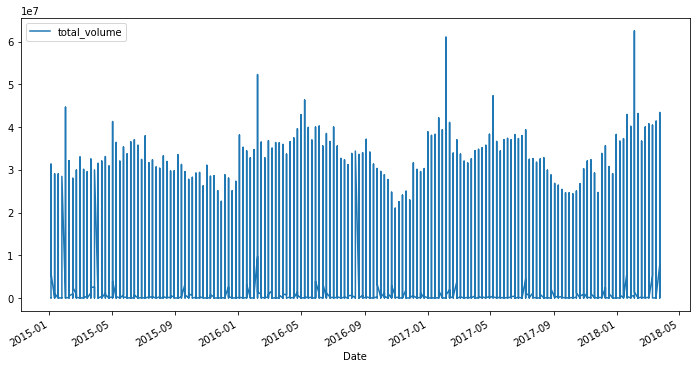

In [ ]:
df_abacate_volume.plot(y='total_volume', use_index=True, figsize=(12,6))

# Normalização

In [ ]:
import numpy as np 

def NormalizeData(data):
    return (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data))

  
df_abacate_volume['total_volume_norm'] = NormalizeData(df_abacate_volume.total_volume)

## Estacionariedade

Há estacionariedade quando a série temporal (TS) se desenvolve no tempo aleatoriamente ao redor de características (média, variância, autocorrelação, etc) constantes, ou seja, quando o comportamento dos dados permanece o mesmo. 


Para provar se uma TS é ou não estacionária em python, é possível realizar o teste de Dickey-Fuller Aumentado. Neste método assume-se que os dados são não estacionários. Após o teste, se a estatística de teste for menor que o valor crítico, a série é estacionária.

Como pode ser observado abaixo, ao realizar o teste de Dickey-Fuller na TS de vendas de abacates nos EUA entre 2013 e 2018, é possível observar que ela não é estacionária, uma vez que o valor de teste não é menor que os valores críticos.



In [ ]:
from statsmodels.tsa.stattools import adfuller

print("Observations of Dickey-fuller test")
dftest = adfuller(df_abacate_volume['total_volume_norm'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -1.408993e+01
p-value                        2.733041e-26
#lags used                     4.500000e+01
number of observations used    1.820300e+04
critical value (1%)           -3.430709e+00
critical value (5%)           -2.861699e+00
critical value (10%)          -2.566855e+00
dtype: float64


Verificar a estacionariedade é importante porque uma TS estacionária tem propriedades estatísticas específicas que permitem prever um resultado provável. Por outro lado, se não houver consistência no comportamento dos dados, as previsões realizadas com eles terão precisões variadas.

Existem diversas maneiras de tornar uma TS estacionária, uma delas é através de transformações dos dados, que podem ser logarítmicas, em raiz quadrada, em raiz cúbica, etc. 


In [ ]:
df_abacate_volume['total_volume_log'] = np.log(df_abacate_volume['total_volume_norm'])
df_abacate_volume['total_volume_sqrt'] = np.sqrt(df_abacate_volume['total_volume_norm'])
df_abacate_volume['total_volume_cbrt'] = np.cbrt(df_abacate_volume['total_volume_norm'])

Após transformações, é adicionada uma linha com valor inf. Ela precisa ser excluída para não dar erro ao testar a estacionariedade.

In [ ]:
df_abacate_volume = df_abacate_volume.replace([np.inf, -np.inf], np.nan).dropna()
#df_abacate_volume.dropna(inplace=True)

In [ ]:
print("Observations of Dickey-fuller test")
dftest = adfuller(df_abacate_volume['total_volume_log'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -8.208830e+00
p-value                        6.906513e-13
#lags used                     2.700000e+01
number of observations used    1.822000e+04
critical value (1%)           -3.430709e+00
critical value (5%)           -2.861699e+00
critical value (10%)          -2.566854e+00
dtype: float64


In [ ]:
print("Observations of Dickey-fuller test")
dftest = adfuller(df_abacate_volume['total_volume_sqrt'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -1.165830e+01
p-value                        1.961067e-21
#lags used                     4.500000e+01
number of observations used    1.820200e+04
critical value (1%)           -3.430709e+00
critical value (5%)           -2.861699e+00
critical value (10%)          -2.566855e+00
dtype: float64


In [ ]:
print("Observations of Dickey-fuller test")
dftest = adfuller(df_abacate_volume['total_volume_cbrt'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -1.028287e+01
p-value                        3.739896e-18
#lags used                     4.500000e+01
number of observations used    1.820200e+04
critical value (1%)           -3.430709e+00
critical value (5%)           -2.861699e+00
critical value (10%)          -2.566855e+00
dtype: float64


Observa-se que apenas a transformação logarítmica teve resultado estacionário; raiz cúbica e raiz quadrada tiveram valores de testes maiores que valores críticos, portanto, não estacionários.

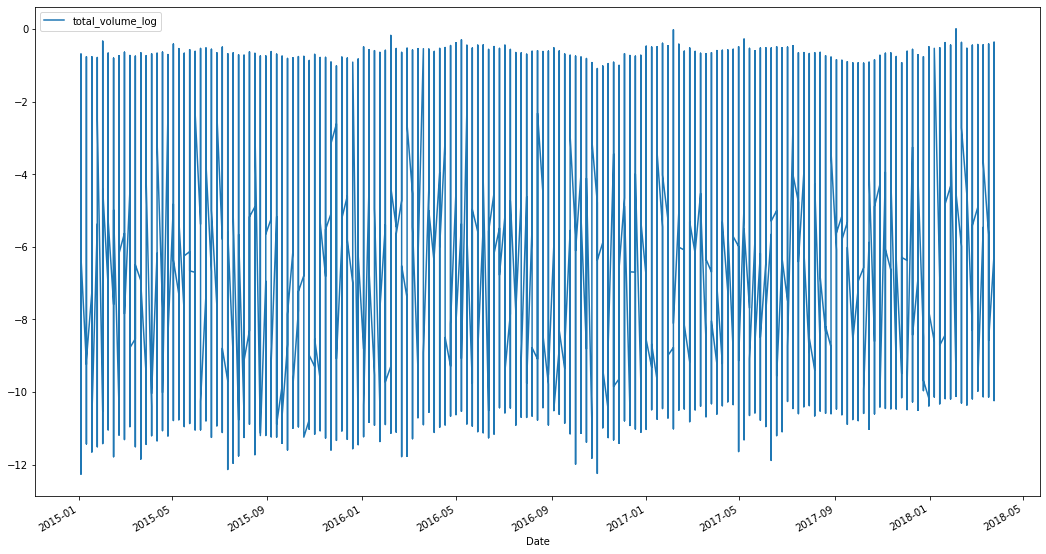

In [ ]:
df_abacate_volume.plot(y='total_volume_log', use_index=True, figsize=(18,10))

# Sazonalidade

In [ ]:
df_abacate_volume_estac = df_abacate_volume[['total_volume_log']]
df_abacate_volume_estac.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18248 entries, 2015-12-27 to 2018-01-07
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_volume_log  18248 non-null  float64
dtypes: float64(1)
memory usage: 285.1 KB


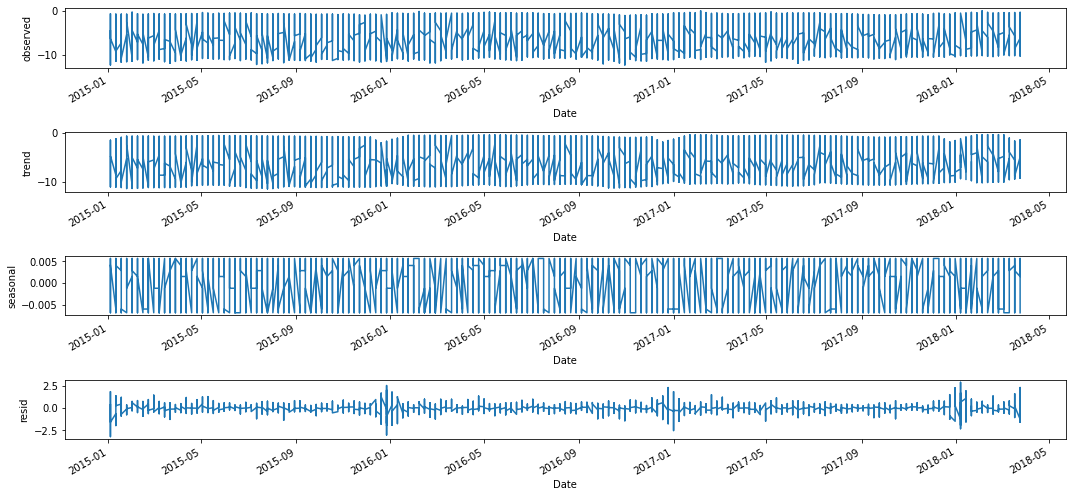

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 


result = seasonal_decompose(df_abacate_volume_estac['total_volume_log'], model="additive", freq=365)
 
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,7))
result.observed.plot(ax=ax1)
ax1.set_ylabel("observed")
result.trend.plot(ax=ax2)
ax2.set_ylabel("trend")
result.seasonal.plot(ax=ax3)
ax3.set_ylabel("seasonal")
result.resid.plot(ax=ax4)
ax4.set_ylabel("resid")
plt.tight_layout()